In [230]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [231]:
data=pd.read_csv("C:/Users/Salma/Downloads/orbit.csv") #reading csv file

In [232]:
data.head() 

,time_steps,y
0,-10.000000,100.000000
1,-9.989995,99.800000
2,-9.979990,99.600200
3,-9.969985,99.400601
4,-9.959980,99.201201


In [233]:
data.isnull().sum() #checking if there are null values

time_steps    0
y             0
dtype: int64

In [234]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
#structure of the neural network
model.add(Dense(1024, input_shape=(1, ), activation='relu'))

model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(1))

model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_129 (Dense)           (None, 1024)              2048      
                                                                 
 dense_130 (Dense)           (None, 512)               524800    
                                                                 
 dense_131 (Dense)           (None, 256)               131328    
                                                                 
 dense_132 (Dense)           (None, 128)               32896     
                                                                 
 dense_133 (Dense)           (None, 64)                8256      
                                                                 
 dense_134 (Dense)           (None, 32)                2080      
                                                                 
 dense_135 (Dense)           (None, 16)              

In [235]:
# Compile your model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [236]:
X = data['time_steps'].values.reshape(-1, 1)
y = data['y'].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=True)

In [237]:
model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))


print('Training started..., this can take a while:')

Epoch 1/50
50/50 [==============================] - 2s 11ms/step - loss: 574.7709 - mae: 16.1099 - val_loss: 129.7843 - val_mae: 10.1630
Epoch 2/50
50/50 [==============================] - 0s 8ms/step - loss: 110.9007 - mae: 9.0715 - val_loss: 83.8110 - val_mae: 7.8947
Epoch 3/50
50/50 [==============================] - 0s 8ms/step - loss: 67.0095 - mae: 6.6837 - val_loss: 44.2743 - val_mae: 5.0555
Epoch 4/50
50/50 [==============================] - 0s 8ms/step - loss: 26.7718 - mae: 3.9113 - val_loss: 9.5809 - val_mae: 2.1884
Epoch 5/50
50/50 [==============================] - 0s 8ms/step - loss: 4.3629 - mae: 1.2679 - val_loss: 3.9129 - val_mae: 1.1506
Epoch 6/50
50/50 [==============================] - 0s 8ms/step - loss: 2.1504 - mae: 0.9031 - val_loss: 0.8717 - val_mae: 0.5911
Epoch 7/50
50/50 [==============================] - 0s 8ms/step - loss: 0.7048 - mae: 0.4918 - val_loss: 0.2789 - val_mae: 0.2935
Epoch 8/50
50/50 [==============================] - 0s 8ms/step - loss: 0.396

7/7 [==============================] - 0s 3ms/step


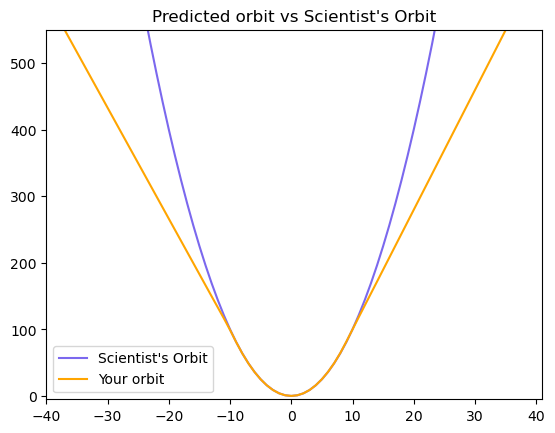

In [238]:
def plot_orbit(model_preds):
    axeslim = int(len(model_preds) / 2)
    plt.plot(np.arange(-axeslim, axeslim + 1),np.arange(-axeslim, axeslim + 1) ** 2,
             color="mediumslateblue")
    plt.plot(np.arange(-axeslim, axeslim + 1),model_preds,color="orange")
    plt.axis([-40, 41, -5, 550])
    plt.legend(["Scientist's Orbit", 'Your orbit'],loc="lower left")
    plt.title("Predicted orbit vs Scientist's Orbit")
    plt.savefig("predicted_orbit.png", format='png')
# Predict the eighty minute orbit
eighty_min_orbit = model.predict(np.arange(-100, 101))

# Plot the eighty minute orbit
plot_orbit(eighty_min_orbit)

In [239]:
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")

13/13 [==============================] - 0s 3ms/step
MSE: 0.049093451916075184
MAE: 0.14910284519626069
R2 Score: 0.9999441435128134
